## NAME: SUGANDHA NEGI
## Organization: The Sparks Foundation
## Data Science and Buisness Analytics Task-6
## Prediction using Decision Tree Algorithm
- Create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Import the libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
#load the iris data
data_iris=load_iris()

#create a data frame for it
data=pd.DataFrame(data_iris.data,columns=data_iris.feature_names)

#create coloumn for target 
data['target']=data_iris.target

### Getting Descriptive statistics of our Dataset

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
#check for dupliates
data.duplicated().sum()

1

In [7]:
#drop those duplicates
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

Splitting the data to train and test set using the sklearn train_test_split method.

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data[data_iris.feature_names], data['target'], random_state=0)

### Modeling the pattern

In [10]:
#create an instance for the model
classf = DecisionTreeClassifier(max_depth=2, random_state=0)

In [11]:
classf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [12]:
y_pred=classf.predict(x_test)

In [13]:
y_pred

array([1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1])

### Visualize Decision Tree
ploting thte tree to visualize it

[Text(133.92000000000002, 181.2, 'X[3] <= 0.75\ngini = 0.666\nsamples = 111\nvalue = [36, 36, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.499\nsamples = 75\nvalue = [0, 36, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

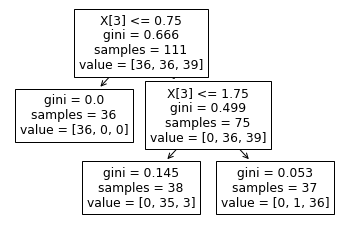

In [17]:
tree.plot_tree(classf)

In [18]:
features = ['Sepal Length(cm)', 'Sepal Width(cm)', 'Petal length(cm)', 'Petal Width(cm)']
classes = ['Sentosa', 'Versicolor', 'Verginica']

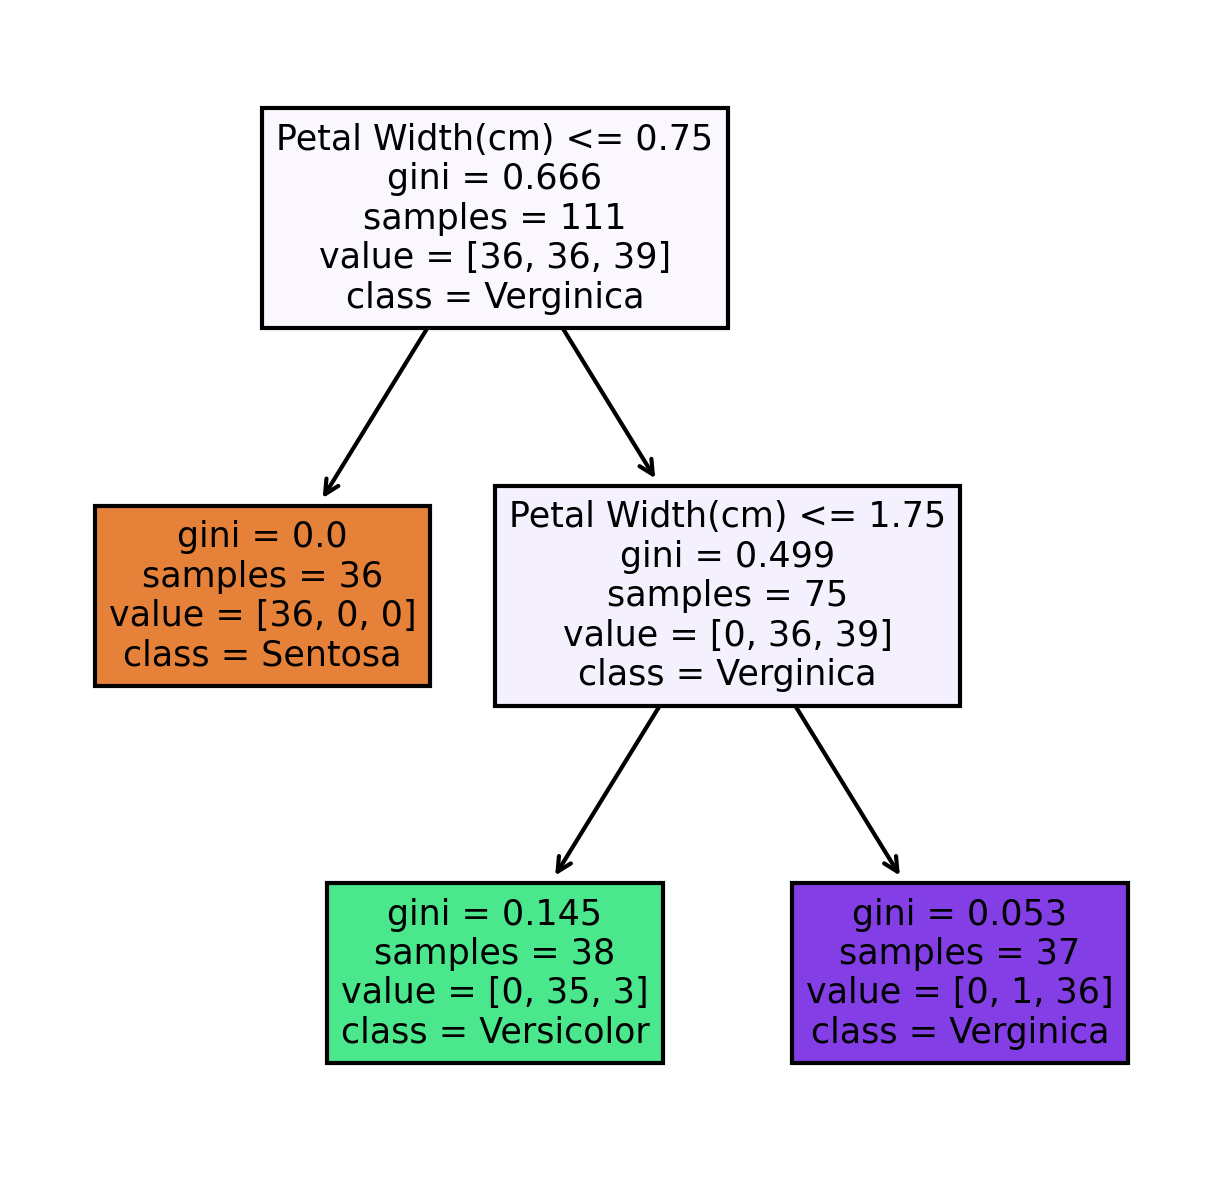

In [19]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=300)
tree.plot_tree(classf,feature_names=features,class_names=classes,ax=ax,filled=True)
plt.show()

In [20]:
#save the image of the tree
fig.savefig('Iris_decision_tree.jpg')

### Decision Tree using another method

In [21]:
#representing using text
text_rep=tree.export_text(classf)
text_rep

'|--- feature_3 <= 0.75\n|   |--- class: 0\n|--- feature_3 >  0.75\n|   |--- feature_3 <= 1.75\n|   |   |--- class: 1\n|   |--- feature_3 >  1.75\n|   |   |--- class: 2\n'

In [22]:
#write to file
with open("decision_tree.log", "w") as fout:
    fout.write(text_rep)

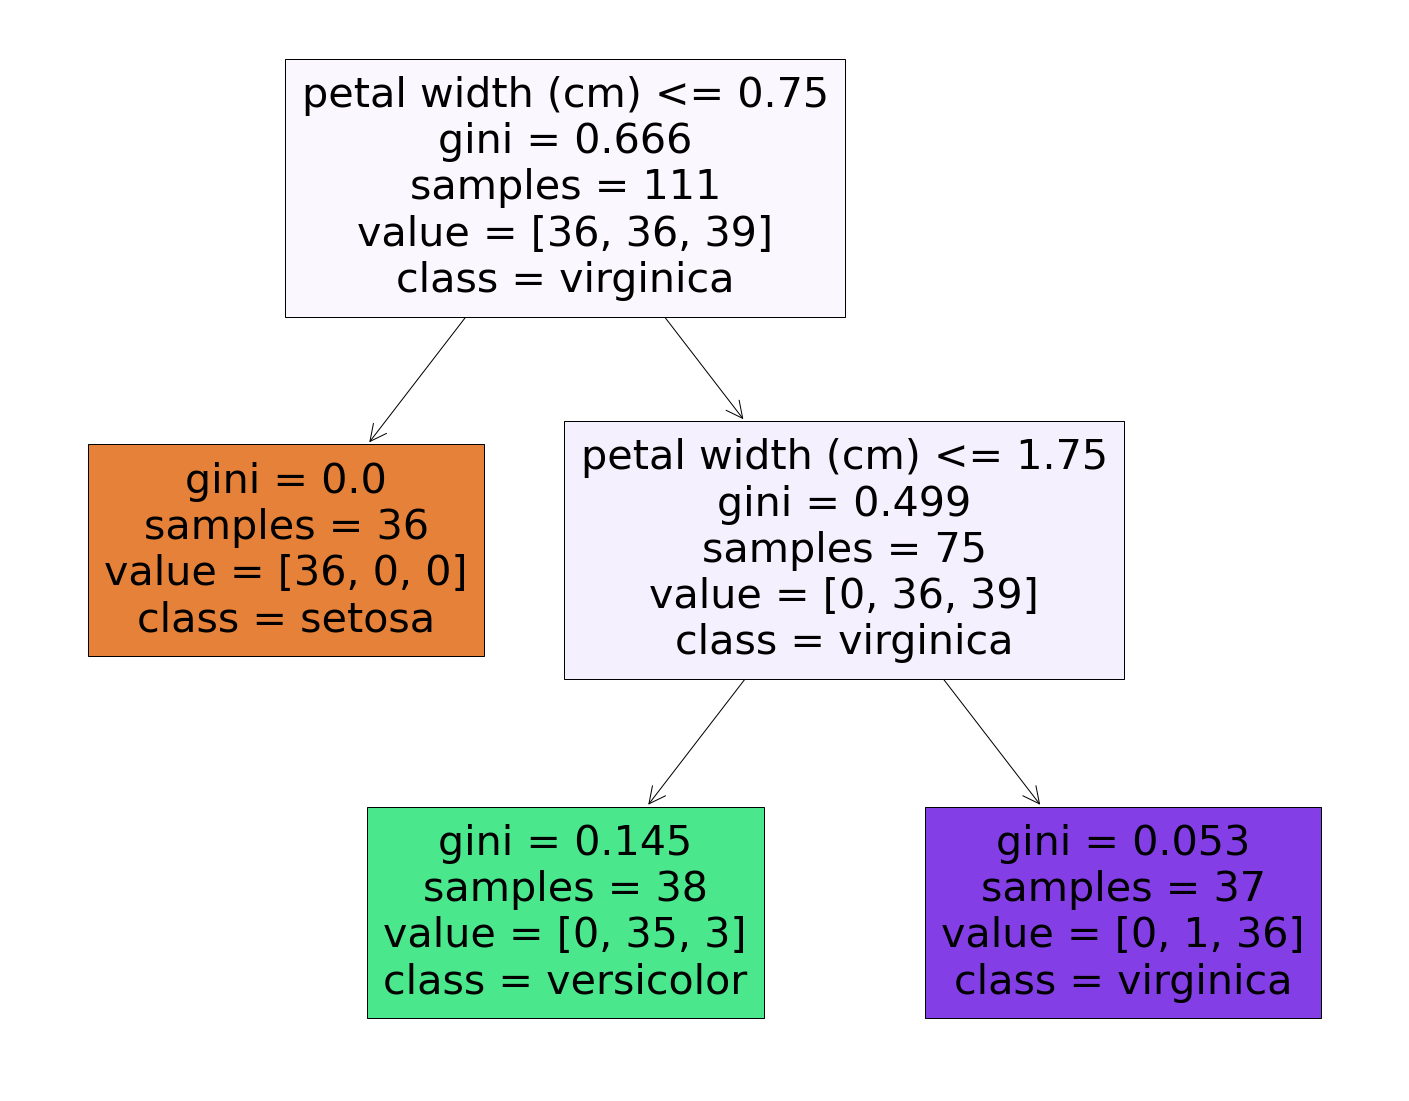

In [23]:
fig=plt.figure(figsize=(25,20))
d_tree= tree.plot_tree(classf, feature_names=data_iris.feature_names, class_names=data_iris.target_names,filled=True)

In [24]:
#save the image of the tree
fig.savefig('iris_decision_tree2.jpg')